# ACT CW2 Q1

__Q1 Objective:__

Process dataset using traditional machine learning techniques.

### Import Libraries

In [134]:
# import necessary libraries

import numpy as np # numpy
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for data visualisation

# machine learning libraries and models

from sklearn.model_selection import train_test_split
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier

> ## Preparing the Dataset

### Load in the data

Load in the data file (csv file), add the data to a pandas dataframe, and print out the first few rows.

In [135]:
# import the data file
# data is in the file "psion_upsilon.csv"

# read in the file and store it in a pandas dataframe
rawdata_df = pd.read_csv('psion_upsilon.csv')

In [136]:
# check the dataframe is what we expect

# print the column headings 
print(rawdata_df.columns)
print(f"\n")

# and top few rows of data
print(rawdata_df.head)

# print the shape of the dataframe
#print(rawdata_df.shape)

Index(['Unnamed: 0', 'Run', 'Event', 'type1', 'E1', 'px1', 'py1', 'pz1', 'pt1',
       'eta1', 'phi1', 'Q1', 'type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2',
       'phi2', 'Q2', 'class'],
      dtype='object')


<bound method NDFrame.head of        Unnamed: 0     Run       Event type1       E1      px1      py1  \
0               0  167807  1101779335     G   5.8830   3.6101   2.3476   
1               1  167102   286049970     G  13.7492  -1.9921  11.8723   
2               2  160957   190693726     G   8.5523   1.4623   4.5666   
3               3  166033   518823971     G   7.5224   0.1682  -3.5854   
4               4  163589    49913789     G  12.4683   8.1310  -1.6633   
...           ...     ...         ...   ...      ...      ...      ...   
39995       39995  166033   460063858     G  21.1411  -9.3928  10.8857   
39996       39996  173692   573648364     G  29.4819  16.1461  21.9823   
39997       39997  166895   139351693     G   9.2451  -4.9421   2.0173   
39998       399

In [137]:
# remove unnecessary data
# look at the properties of our raw dataframe

# print column headers
print(rawdata_df.columns)
# and shape of the dataframe
print(rawdata_df.shape)
# 40,000 rows x 22 columns

print(f"\n") # spacing out the outputs

# but we don't need the first 3 columns
# which are index, run number, and event number

# (the final column is the target array)
#features_df = rawdata_df.iloc[:, 3:21]
# also could have called it reduced_df

# df.iloc indices are start inclusive and end exclusive
# drop columns 0, 1, and 2
# so keep all rows, and columns 3-21
features_df = rawdata_df.iloc[:, 3:]

# print out the new columns and size
print(features_df.columns)
print(features_df.shape)
# 40,000 rows x 19 columns

# we have removed 'Unnamed (index)', 'Run', and 'Event'
# and kept all samples

Index(['Unnamed: 0', 'Run', 'Event', 'type1', 'E1', 'px1', 'py1', 'pz1', 'pt1',
       'eta1', 'phi1', 'Q1', 'type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2',
       'phi2', 'Q2', 'class'],
      dtype='object')
(40000, 22)


Index(['type1', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2',
       'class'],
      dtype='object')
(40000, 19)


In [138]:
# how many occurences of G and T in each 'type' column?

# type 1
print(features_df['type1'].value_counts())
print(features_df['type1'].value_counts(normalize=True))

print("\n")

# type 2
print(features_df['type2'].value_counts())
print(features_df['type2'].value_counts(normalize=True))

type1
G    40000
Name: count, dtype: int64
type1
G    1.0
Name: proportion, dtype: float64


type2
G    36121
T     3879
Name: count, dtype: int64
type2
G    0.903025
T    0.096975
Name: proportion, dtype: float64


In [139]:
# as G is 100% of the values in 'type1'
# there is no point keeping this column
# rewrite the dataframe without this column
features_df = features_df.drop('type1', axis=1)

# check one of the columns is gone
print(features_df.shape) # 40000 x 18
# only run this code once as we are rewriting it

(40000, 18)


In [140]:
# just out of curiosity
# how many occurences of J/psi and upsilon in 'class'

print(features_df['class'].value_counts())
print(features_df['class'].value_counts(normalize=True))

class
upsilon    20000
J/psi      20000
Name: count, dtype: int64
class
upsilon    0.5
J/psi      0.5
Name: proportion, dtype: float64


### Create Features matrix and Target array

In [141]:
# split into feature matrix and target array
# X and y

# the feature matrix contains the input data
# drop the 'class' column from the reduced dataframe
X_total = features_df.drop('class', axis=1)

# the target array is the information with which we want the data to be classified (the "label")
# end column of the features dataframe
y_total = features_df['class']

# check type and size of both X and y

# print types
print(type(X_total)) # pd dataframe
print(type(y_total)) # pd series
# print shapes
print(X_total.shape) # (40000, 17)
print(y_total.shape) # (40000,)

# what does this comma mean?

#print("X_total: " + str.format(X_total.shape))
# this does not work as .shape is a tuple

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(40000, 17)
(40000,)


### Plot the data using PairPlot (full output - leave for now)

In [66]:
# this plot is far too large
# do another pairplot with just the training data (25% of the total data)
# could also use pairgrid and play around with the parameters

KeyboardInterrupt: 

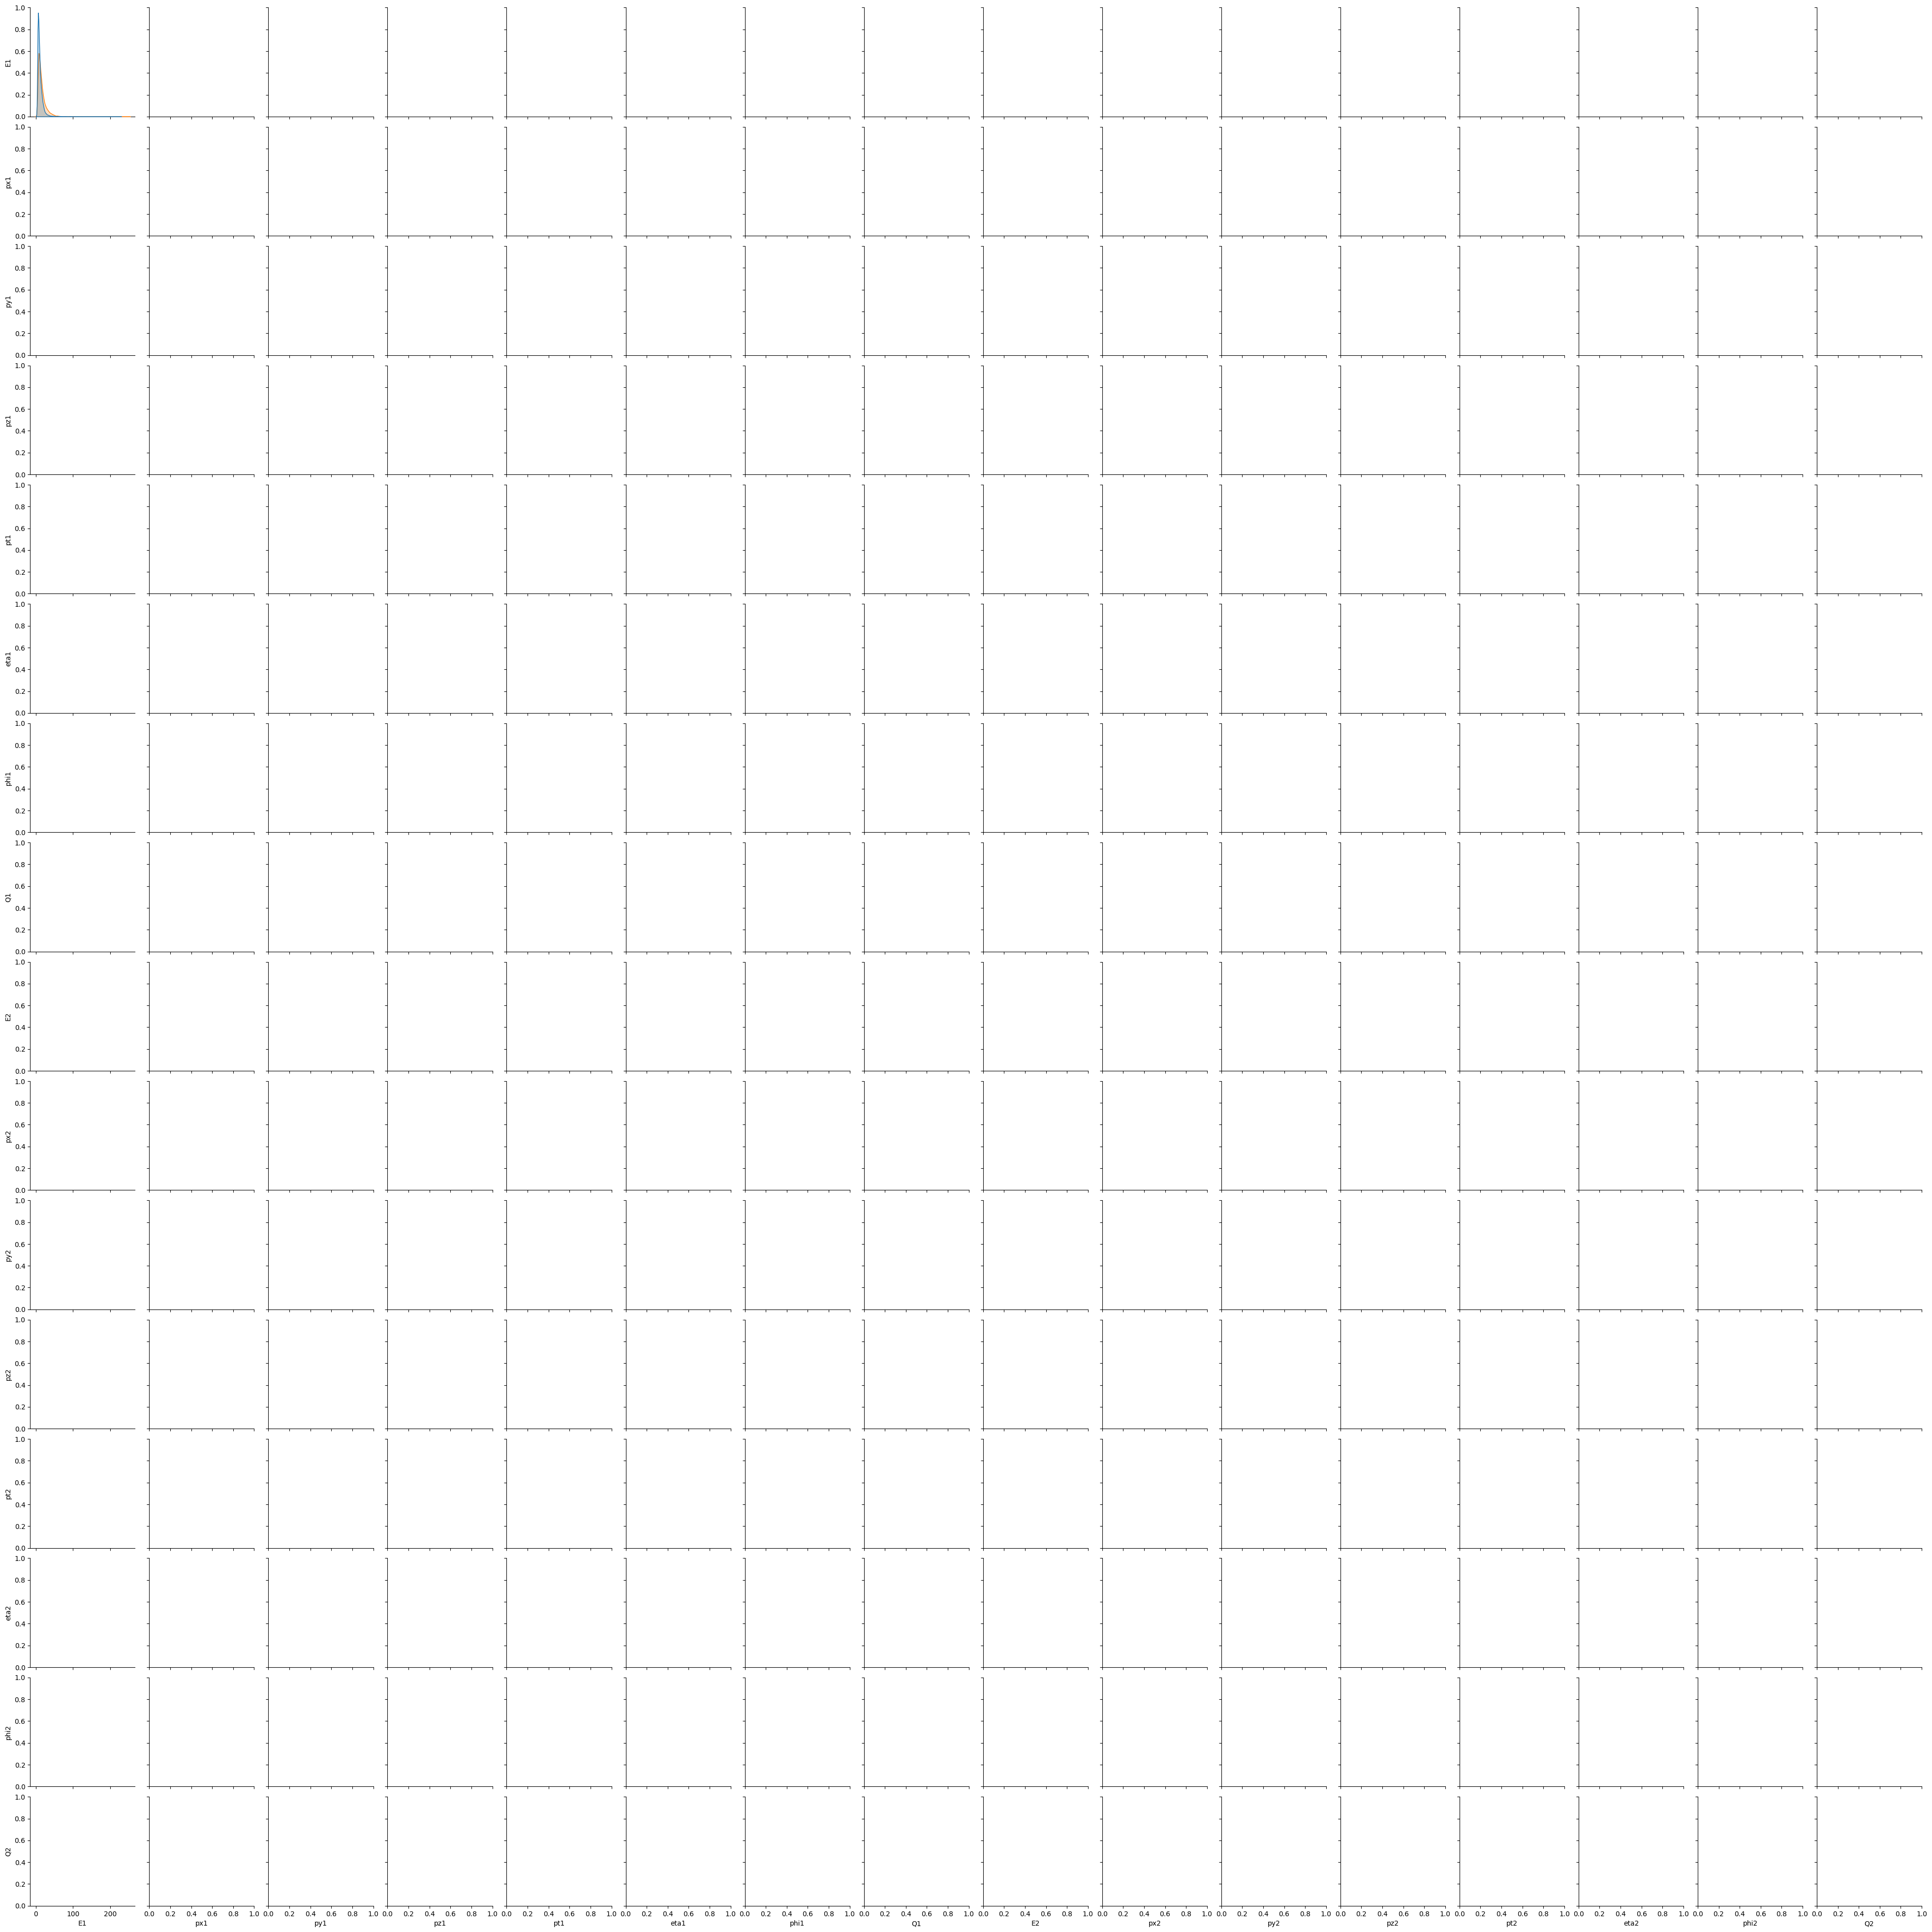

In [67]:
# this plot could take some time
# plot all of the 18 features against each other
# colour code the points using 'class'

sns.pairplot(features_df, hue='class')

# this plot took 24m 40s to run
# so we will need to make this more efficient
# as it took so long to generate, keep this plot for now

### Split into Test and Training data

In [142]:
# use train_test_split to split the data
# allocate some of the data for training the model
# and the rest can be used to check its accuracy

# use 10,000 samples for training
# so train_size = 0.25

# use random state for reproducible random shuffling
# look at the rest of the possible arguments

X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, train_size=0.25, random_state=13)

# check the sizes of the outputs

# training data
# should be 10,000 randomly selected samples
print("X_train:")
print(X_train.shape)
print("y_train:")
print(y_train.shape)
# 10000 x 17 and 10000 x 1

print(f"\n") # space between outputs

# test data
# should be the 30,000 remaining samples
print("X_test:")
print(X_test.shape)
print("y_test:")
print(y_test.shape)
# 30000 x 17 and 30000 x 1

# these shapes are what we expect


X_train:
(10000, 17)
y_train:
(10000,)


X_test:
(30000, 17)
y_test:
(30000,)


### Plot the Training Data using PairPlot

In [143]:
# firstly need all of the training data in one dataframe (for now)
training_df = pd.concat([X_train, y_train], axis=1)

# check this has created the object we want
print(training_df.shape) # 10000 x 18
print(training_df.columns) # this is correct

(10000, 18)
Index(['E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'type2', 'E2',
       'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'class'],
      dtype='object')


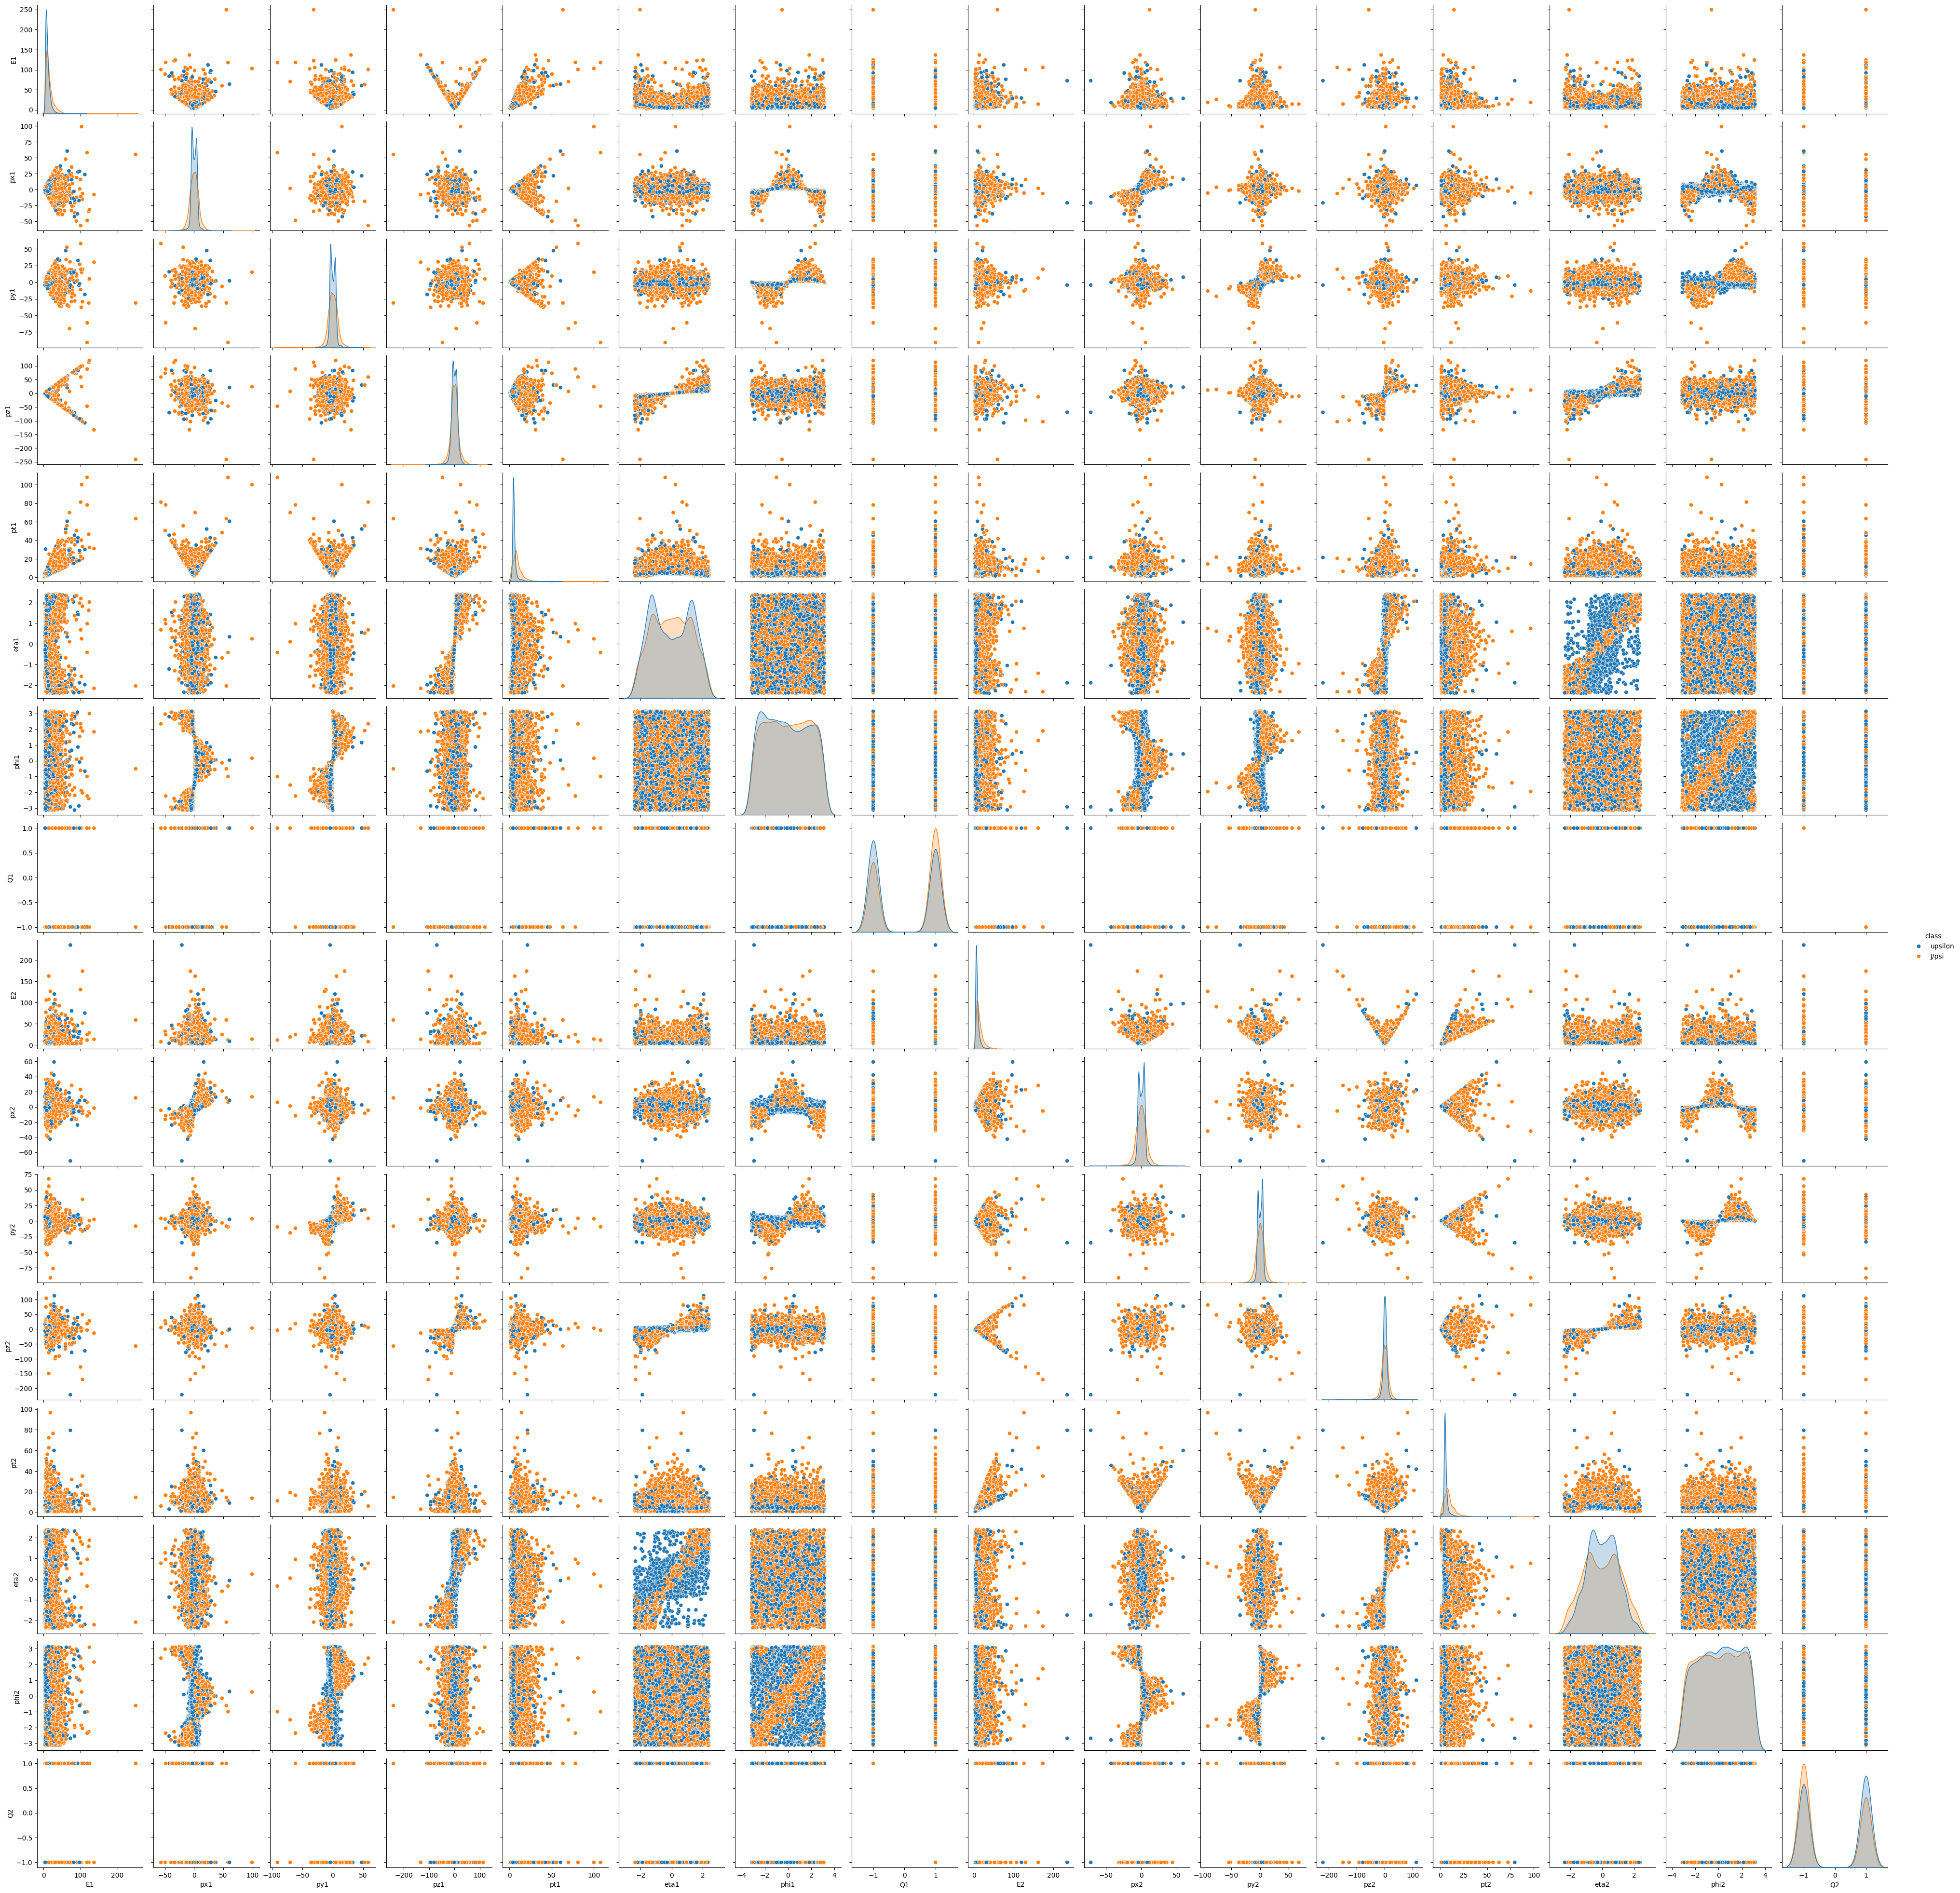

In [ ]:
# try producing another pairplot 
# same as before but with 75% less data points

# plotting all 18 features
# colour code the points using 'class'
sns.pairplot(training_df, hue='class')


## running this took 7m and 18s

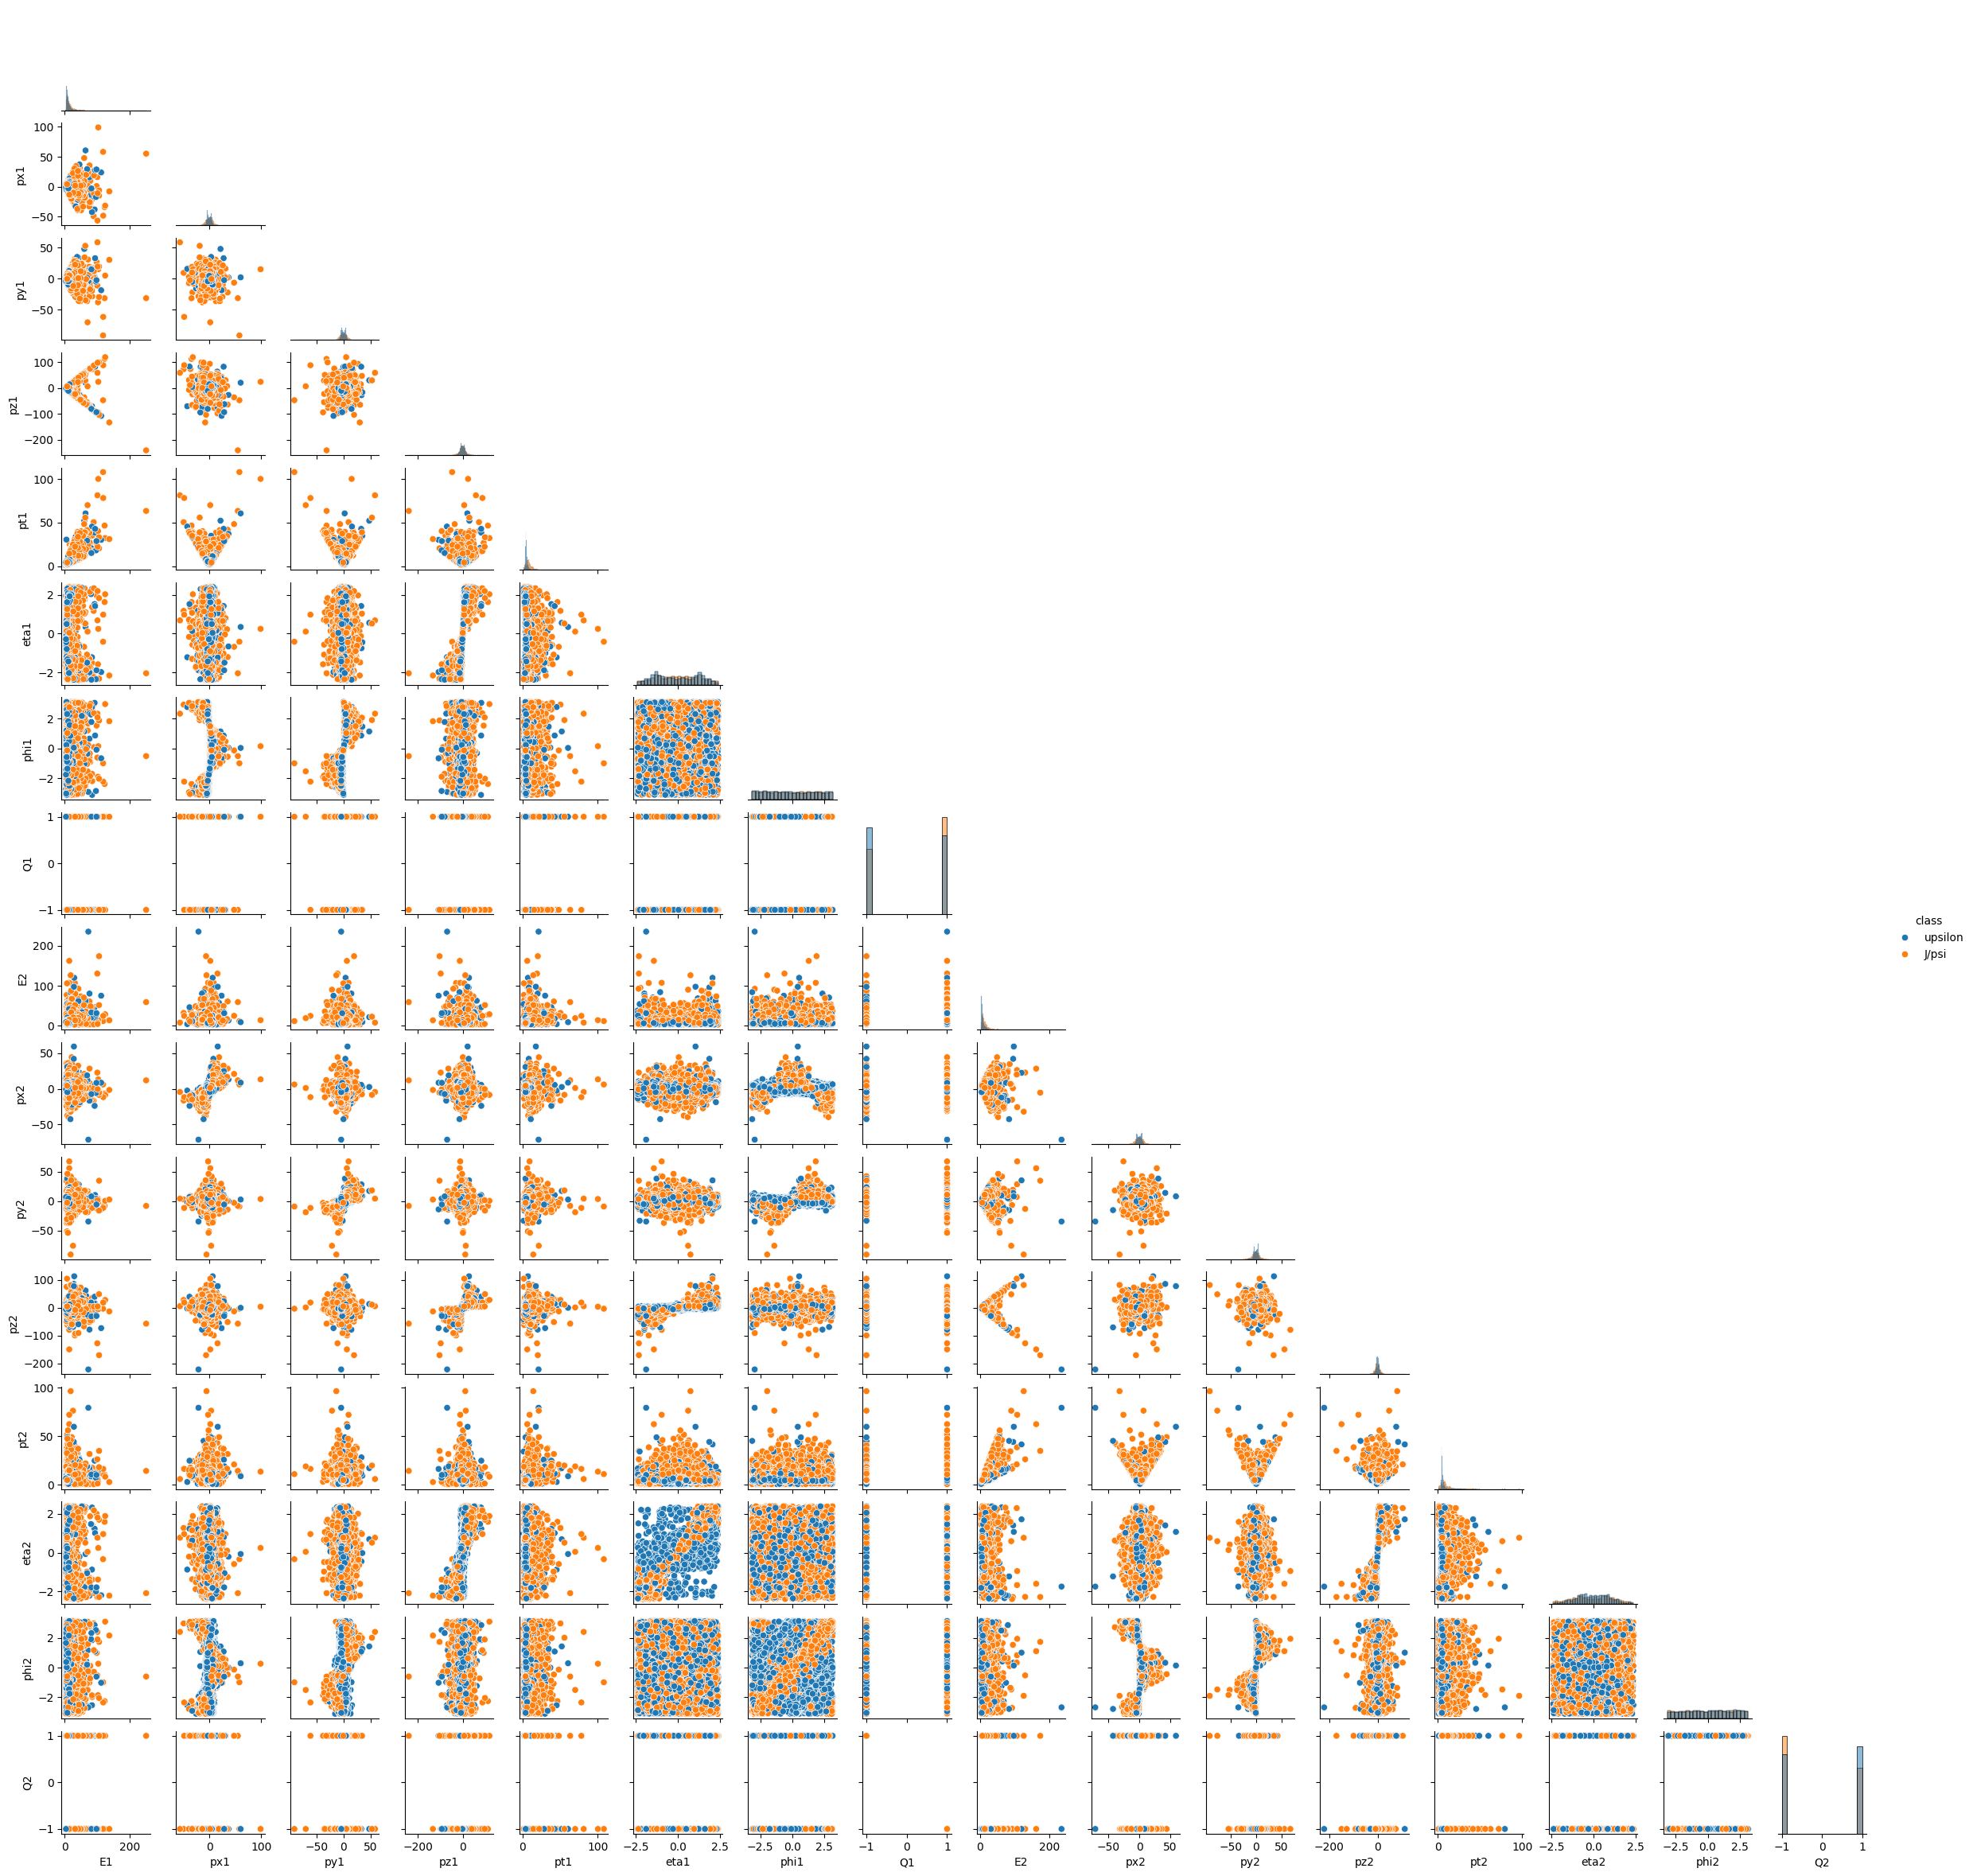

In [ ]:
# now try customising more with a pairgrid ?
# or stick with pairplot ?

# colour coded using the final column, 'class'
# don't produce each plot twice - set corner = True
# height=1.5 (measured in inches per plot)

# the diagonal plots are currently KDEs
# (Kernel Density Estimation plots)
# which use more computing power as they are normalised
# plot these as a histogram instead

sns.pairplot(training_df, hue='class', corner=True, diag_kind='hist', height=1.5)

## running this takes 3m 9s

Features of the pair plot - Is there anything we can infer from the data visualisation?

> ## Preprocess the Data (Feature Engineering / Augmentation)

> ## Train the Model

### One-Hot Encoding for Non-numerical Values

In [124]:
# test on just the series
# before messing with the dataframe

# need to change the 'type2' variables into numerical values
# using get_dummies - essentially a one-hot encoder
type2 = features_df['type2']
# check the variables and shape
print(type2.head)
print(type2.shape)

type2_onehot = pd.get_dummies(type2, drop_first=True)
# check the variables and shape
print(type2_onehot.head)
print(type2_onehot.shape)
# if no drop_first, we get 2 columns, with headings G and T

#print(type2.head)

<bound method NDFrame.head of 0        G
1        G
2        G
3        G
4        G
        ..
39995    G
39996    G
39997    T
39998    G
39999    G
Name: type2, Length: 40000, dtype: object>
(40000,)
<bound method NDFrame.head of            T
0      False
1      False
2      False
3      False
4      False
...      ...
39995  False
39996  False
39997   True
39998  False
39999  False

[40000 rows x 1 columns]>
(40000, 1)


In [ ]:
# now try one-hot encoding directly on the dataframe

# need to change the 'type2' variables into numerical values
# using get_dummies - essentially a one-hot encoder

print(features_df.head)
# check the variables and shape
print(features_df.head)
print(features_df.shape)
print(features_df.columns)

# do the actual encoding
features_onehot_df = pd.get_dummies(features_df, columns=['type2'], drop_first=True)

# check the variables and shape
print(features_onehot_df.head)
print(features_onehot_df.shape)
print(features_onehot_df.columns)
# if no drop_first, we get 2 columns, with headings G and T

# replaces the type2 (G/T) column with type2_t (True/False)
# but moves the type2_T column to the end of the table

<bound method NDFrame.head of             E1      px1      py1      pz1      pt1    eta1    phi1  Q1 type2  \
0       5.8830   3.6101   2.3476   4.0069   4.3062  0.8314  0.5766  -1     G   
1      13.7492  -1.9921  11.8723  -6.6416  12.0382 -0.5270  1.7370   1     G   
2       8.5523   1.4623   4.5666   7.0809   4.7950  1.1818  1.2609   1     G   
3       7.5224   0.1682  -3.5854   6.6100   3.5894  1.3704 -1.5239   1     G   
4      12.4683   8.1310  -1.6633  -9.3042   8.2994 -0.9644 -0.2018   1     G   
...        ...      ...      ...      ...      ...     ...     ...  ..   ...   
39995  21.1411  -9.3928  10.8857  15.4987  14.3779  0.9354  2.2827   1     G   
39996  29.4819  16.1461  21.9823  11.1918  27.2749  0.3996  0.9373   1     G   
39997   9.2451  -4.9421   2.0173  -7.5476   5.3380 -1.1461  2.7540   1     T   
39998  11.2984 -10.6532  -1.8375  -3.2825  10.8105 -0.2992 -2.9708  -1     G   
39999  21.5936  11.3939 -12.8656 -13.0740  17.1855 -0.7017 -0.8460   1     G   

         

In [ ]:
# third attempt
# do this on just the series
# # then replace the column in the dataframe

# need to change the 'type2' variables into numerical values
# using get_dummies - essentially a one-hot encoder

# one-hot encode on just the type2 column
# use drop_first=False
# get a 2-column table
type2_onehot = pd.get_dummies(features_df['type2'])

# check the original dataframe hasn't changed
print("Features Dataframe:")
print(features_df.shape)
print(features_df.columns)

# check the dummy values dataframe
print("\nDummy Values:")
print(type2_onehot.head)
print(type2_onehot.shape)
print(type2_onehot.columns)
# if no drop_first, we get 2 columns, with headings G and T

# now replace the 'type2' column in the features dataset
# with the G column from the dummy table
# and rename column as type2_G

#features_onehot_df = features_df.replace(to_replace=)
features_df['type2'] = type2_onehot['G']

# then rename this column
# to reflect the new Boolean values
features_df.rename(columns={'type2' : 'type2_G'}, inplace=True)

# check everything has updated correctly
print("\nFeatures Dataframe Updated:")
print(features_df.shape)
print(features_df.columns)
print(features_df.head)

Features Dataframe:
(40000, 18)
Index(['E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'type2', 'E2',
       'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'class'],
      dtype='object')

Dummy Values:
<bound method NDFrame.head of        False  True 
0      False   True
1      False   True
2      False   True
3      False   True
4      False   True
...      ...    ...
39995  False   True
39996  False   True
39997   True  False
39998  False   True
39999  False   True

[40000 rows x 2 columns]>
(40000, 2)
Index([False, True], dtype='bool')


KeyError: 'G'

### Define and Fit a Decision Tree Classifier

In [ ]:
# train a decision tree classifier for this dataset

# define a decision tree classifier for this dataset
dtc = tree.DecisionTreeClassifier()
# use the training data to train the classifier
dtc.fit(X_train, y_train)

# look at possible arguments for the DecisionTreeClassifier function
# probably need to convert G and B to binary values before passing them into the decision tree

ValueError: could not convert string to float: 'G'

The decision tree cannot handle variables 'type1' and 'type2', as they are non-numerical values. They are a binary classification system with a value of either 'G' or 'T'?

Firstly, count the frequencies of each one. If 99% of the data is type G, for instance, we could just consider this feature not very important.

Or, convert these variables to numerical values, using
- label encoder (not great as may infer correlations where there aren't any)
- one-hot encoder (currently the favourite)
- 

### Get decision tree parameters

In [ ]:
# now get some parameters for the tree
# training accuracy
# test accuracy
# tree parameters
# visualisation of tree
# feature importance
# decision surfaces

# NUMERICAL PARAMETERS

# can use attribute dtc.tree_

# predict the probability of a certain class
#prob_JPsi = dtc.predict_proba(......)
# what needs to go in the argument?
# do the same for prob_Upsilon

# get an accuracy score for the training data
train_acc = dtc.score(X_train, y_train)

# get score for the test data as well
# could also do this in a separate code block
#test_acc = dtc.score(X_test, y_test)


# print all of these results

# print the training accuracy
print(f"Training accuracy: {train_acc}")


# PLOTS / VISUALISATION

# plot the decision tree
#tree.plot_tree(dtc)
# arguments: class_names, filled, impurity

# plot the decision boundaries
# will need to use
#from sklearn.inspection import DecisionBoundaryDisplay
# this will be multiple lines 
# and will probably need to loop over each pair of parameters




ValueError: could not convert string to float: 'G'

In [ ]:
# "Decision trees tend to overfit on data with a large number of features. 
# Getting the right ratio of samples to number of features is important, 
# since a tree with few samples in high dimensional space is very likely to overfit."

> ## Additional Code (after Decision Tree)

- Ensemble methods (Random Forest or Gradient Boosting)

- Test the model using the X and y test data

- Produce an accuracy score and some other output parameters

### Links

* https://www.w3schools.com/python/pandas/pandas_csv.asp
* https://www.geeksforgeeks.org/python/how-to-get-column-names-in-pandas-dataframe/
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://pandas.pydata.org/docs/user_guide/merging.html
* https://seaborn.pydata.org/generated/seaborn.pairplot.html
* https://seaborn.pydata.org/generated/seaborn.PairGrid.html
* https://seaborn.pydata.org/generated/seaborn.kdeplot
* https://codefinity.com/courses/v2/47339f29-4722-4e72-a0d4-6112c70ff738/306bfbcf-d7b2-4979-a33a-3dee2744d31d/86a67d0a-a1ee-41b9-a35f-060398703814
* https://scikit-learn.org/stable/modules/tree.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
* https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
* https://scikit-learn.org/stable/modules/ensemble.html
* 
